## Nayana R
## To Explore Supervised Machine Learning

#### 1. Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

#### 2. Import the dataset from the url

In [2]:
url ="http://bit.ly/w-data"
data = pd.read_csv(url)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### 3. Plot the data to find the relationships

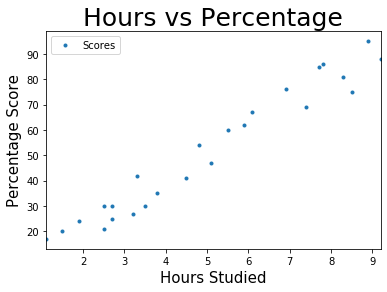

In [5]:
data.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage', fontsize=25)  
plt.xlabel('Hours Studied', fontsize=15)  
plt.ylabel('Percentage Score', fontsize=15)  
plt.show()

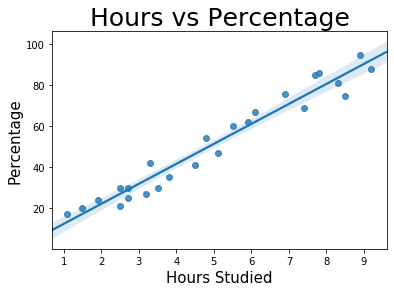

In [6]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.title("Hours vs Percentage", fontsize=25)
plt.xlabel("Hours Studied", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.show()

#### 4. Indicate labels for the data. Let marks obtained be the label

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [8]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### 5. Split the data into training and testing sets using sklearn

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 60)

In [10]:
type(X_train)

numpy.ndarray

Text(0, 0.5, 'Scores(y+train + y_test)')

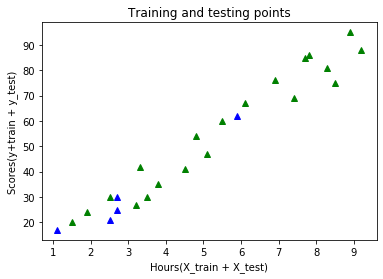

In [11]:
plt.plot(X_train, y_train, 'g^')
plt.plot(X_test, y_test, 'b^')
plt.title('Training and testing points')
plt.xlabel('Hours(X_train + X_test)')
plt.ylabel('Scores(y+train + y_test)')

#### 6. Train the model using Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print("Value of m is", lr.coef_)

Value of m is [9.69103963]


In [14]:
print("Value of c is", lr.intercept_)

Value of c is 3.105461262328781


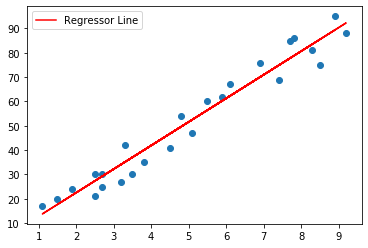

In [15]:
# plot the regression line in the graph
line = lr.coef_ * X + lr.intercept_
plt.scatter(X,y)
plt.plot(X, line, 'r')
plt.legend(['Regressor Line'])

#### 7. Predict the test values

In [16]:
y_pred = lr.predict(X_test)

In [17]:
print(y_pred)

[13.76560485 29.27126825 60.28259506 27.33306033 29.27126825]


In [18]:
#Compare the actual and predicted values
comparison = pd.DataFrame({'Actual_val': y_test, 'Predicted': y_pred})
comparison

,Actual_val,Predicted
0,17,13.765605
1,30,29.271268
2,62,60.282595
3,21,27.333060
4,25,29.271268


#### 8. Check the performance of the model using scikitlearn's metrics library

In [19]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [20]:
print("Mean Absolute Error is", mae)
print("Mean Squared Error is", mse)
print("Root Mean Squared Error is", rmse)

Mean Absolute Error is 3.256972083783501
Mean Squared Error is 14.458645457297166
Root Mean Squared Error is 3.802452558191511


#### 9. Predict the value for the question given

In [21]:
# score if the student studies for 9.25 hours a day
hours = 9.2

In [22]:
type(hours)

float

In [23]:
nerd = lr.predict([[hours]])
#the double square brackets is done because the model expects a 2D array and the input we are giving is a 1D array.

In [24]:
nerd

array([92.26302583])